### Importing libraries

In [1013]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.decomposition import PCA

### Loading data

In [1085]:
data=pd.read_csv('dataset_for_analyst_assignment_20201120.csv')
data=pd.DataFrame(data)

### Exploratory data analysis

In [1086]:
data.head(5)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [1087]:
pd.options.display.max_columns=70

In [1088]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

Converting Incorrect data types to correct data types and replacing Nan values

In [1089]:
data['REGISTRATION_DATE']=pd.to_datetime(data['REGISTRATION_DATE'])
data['FIRST_PURCHASE_DAY']=pd.to_datetime(data['FIRST_PURCHASE_DAY'])
data['LAST_PURCHASE_DAY']=pd.to_datetime(data['LAST_PURCHASE_DAY'])

data['PURCHASE_COUNT_DELIVERY']=data['PURCHASE_COUNT_DELIVERY'].fillna(0).astype(int)
data['PURCHASE_COUNT_TAKEAWAY']=data['PURCHASE_COUNT_TAKEAWAY'].fillna(0).astype(int)
data['BREAKFAST_PURCHASES']=data['BREAKFAST_PURCHASES'].fillna(0).astype(int)
data['LUNCH_PURCHASES']=data['LUNCH_PURCHASES'].fillna(0).astype(int)
data['EVENING_PURCHASES']=data['EVENING_PURCHASES'].fillna(0).astype(int)
data['DINNER_PURCHASES']=data['DINNER_PURCHASES'].fillna(0).astype(int)
data['LATE_NIGHT_PURCHASES']=data['LATE_NIGHT_PURCHASES'].fillna(0).astype(int)
data['DISTINCT_PURCHASE_VENUE_COUNT']=data['DISTINCT_PURCHASE_VENUE_COUNT'].fillna(0).astype(int)
data['IOS_PURCHASES']=data['IOS_PURCHASES'].fillna(0).astype(int)
data['WEB_PURCHASES']=data['WEB_PURCHASES'].fillna(0).astype(int)
data['ANDROID_PURCHASES']=data['ANDROID_PURCHASES'].fillna(0).astype(int)
data['USER_HAS_VALID_PAYMENT_METHOD']=data['USER_HAS_VALID_PAYMENT_METHOD'].fillna(0).astype(int)
data['MOST_COMMON_WEEKDAY_TO_PURCHASE']=data['MOST_COMMON_WEEKDAY_TO_PURCHASE'].fillna(0).astype(int)

data['TOTAL_PURCHASES_EUR']=data['TOTAL_PURCHASES_EUR'].fillna(0)
data['MIN_PURCHASE_VALUE_EUR']=data['MIN_PURCHASE_VALUE_EUR'].fillna(0)
data['MAX_PURCHASE_VALUE_EUR']=data['MAX_PURCHASE_VALUE_EUR'].fillna(0)
data['AVG_PURCHASE_VALUE_EUR']=data['AVG_PURCHASE_VALUE_EUR'].fillna(0)

data['USER_ID']=data['USER_ID'].astype('string')

data.head(5)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01,DNK,0,0,0,NaT,NaT,1,0,0,0,0,0,0.000,0,0.000,0.000,0.000,ios,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01,FIN,1,1,0,2020-09-02,2020-09-02,2,0,1,0,0,0,38.456,1,38.532,38.608,38.456,android,0,0,1,NaN,0,23.0,2,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01,DNK,19,19,0,2019-12-10,2020-05-25,3,0,4,1,14,0,631.488,9,20.280,43.688,33.396,android,0,19,0,NaN,1,21.0,2,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01,FIN,0,0,0,NaT,NaT,4,0,0,0,0,0,0.000,0,0.000,0.000,0.000,android,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01,GRC,0,0,0,NaT,NaT,5,0,0,0,0,0,0.000,0,0.000,0.000,0.000,android,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [1090]:
print(any(data['LATE_NIGHT_PURCHASES']>0))
print(any(data['PURCHASE_COUNT_TAKEAWAY']>0))
print(any(data['BREAKFAST_PURCHASES']>0))

False
True
True


This shows that late night purchases in our data is zero for all users

In [1054]:
data.isnull().sum(axis = 0) ## Shows the count of Nan values in each Column

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                        0
PURCHASE_COUNT_TAKEAWAY                        0
FIRST_PURCHASE_DAY                          9947
LAST_PURCHASE_DAY                           9884
USER_ID                                        0
BREAKFAST_PURCHASES                            0
LUNCH_PURCHASES                                0
EVENING_PURCHASES                              0
DINNER_PURCHASES                               0
LATE_NIGHT_PURCHASES                           0
TOTAL_PURCHASES_EUR                            0
DISTINCT_PURCHASE_VENUE_COUNT                  0
MIN_PURCHASE_VALUE_EUR                         0
MAX_PURCHASE_VALUE_EUR                         0
AVG_PURCHASE_VALUE_EUR                         0
PREFERRED_DEVICE                               0
IOS_PURCHASES                                  0
WEB_PURCHASES       

In [1091]:
data[data['PREFERRED_DEVICE'].isnull()==True] ## Shows all the columns where Prefered Devices is null 

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
275,2019-09-01,FIN,0,0,0,NaT,NaT,276,0,0,0,0,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
700,2019-09-01,IND,0,0,0,NaT,NaT,701,0,0,0,0,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
899,2019-09-02,DNK,0,0,0,NaT,NaT,900,0,0,0,0,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1194,2019-09-02,FIN,0,0,0,NaT,NaT,1195,0,0,0,0,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1321,2019-09-02,FIN,0,0,0,NaT,NaT,1322,0,0,0,0,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21006,2019-09-29,DNK,0,0,0,NaT,NaT,21007,0,0,0,0,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21017,2019-09-29,FIN,0,0,0,NaT,NaT,21018,0,0,0,0,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21020,2019-09-29,DNK,0,0,0,NaT,NaT,21021,0,0,0,0,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21027,2019-09-29,FIN,0,0,0,NaT,NaT,21028,0,0,0,0,0,0.0,0,0.0,0.0,0.0,NaN,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [1056]:
data.dropna(subset=['PREFERRED_DEVICE'], inplace=True) ## Removes the 73 rows that have Nan values in Prefered Devices

In [1057]:
data['USER_ID'].unique().shape[0] ## This shows that none of the users is duplicate in the data

21910

In [1058]:
any(data.duplicated()==True) ## Shows there are no duplicates in the data

False

In [1059]:
any(data['FIRST_PURCHASE_DAY']>data['LAST_PURCHASE_DAY']) ## checks if any First Purchase Day is before Last Purchase Day

False

In [1060]:
data[data['FIRST_PURCHASE_DAY']==data['LAST_PURCHASE_DAY']].head(5)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,Denmark,Finland,Greece
1,2019-09-01,FIN,1,1,0,2020-09-02,2020-09-02,2,0,1,0,0,0,38.456,1,38.532,38.608,38.456,android,0,0,1,NaN,0,23.0,2,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,1,0
7,2019-09-01,FIN,1,1,0,2020-10-14,2020-10-14,8,0,0,1,0,0,19.228,1,19.266,19.304,19.228,android,0,0,1,NaN,1,5.0,1,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,1,0
22,2019-09-01,FIN,1,1,0,2020-10-24,2020-10-24,23,0,0,0,1,0,25.300,1,25.350,25.400,25.300,ios,1,0,0,NaN,1,7.0,5,NaN,NaN,9.408,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,1,0
24,2019-09-01,FIN,1,1,0,2020-10-06,2020-10-06,25,0,0,1,0,0,14.168,1,14.196,14.224,14.168,ios,1,0,0,NaN,0,10.0,5,NaN,NaN,7.322,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,1,0
37,2019-09-01,FIN,1,1,0,2020-10-17,2020-10-17,38,0,1,0,0,0,64.768,1,64.896,65.024,64.768,ios,1,0,0,NaN,1,6.0,5,NaN,NaN,7.431,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,1,0


These are the users that have only made purchase on 1 day, we should provide them with promotions and discounts to encorage them to place orders again and convert them into loyal customers

In [1061]:
data[(data['FIRST_PURCHASE_DAY'].isnull()) | (data['LAST_PURCHASE_DAY'].isnull())].head(5)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,Denmark,Finland,Greece
0,2019-09-01,DNK,0,0,0,NaT,NaT,1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,ios,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",1,0,0
3,2019-09-01,FIN,0,0,0,NaT,NaT,4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,android,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,1,0
4,2019-09-01,GRC,0,0,0,NaT,NaT,5,0,0,0,0,0,0.0,0,0.0,0.0,0.0,android,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,1
5,2019-09-01,FIN,0,0,0,NaT,NaT,6,0,0,0,0,0,0.0,0,0.0,0.0,0.0,android,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,1,0
6,2019-09-01,DNK,0,0,0,NaT,NaT,7,0,0,0,0,0,0.0,0,0.0,0.0,0.0,ios,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",1,0,0


These customers registered in the app but never placed any order so we should provide them with promotions and discounts to encorage them to place orders and convert them into loyal customers

In [1062]:
data.describe()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,Denmark,Finland,Greece
count,21910.000000,21910.000000,21910.000000,21910.000000,21910.000000,21910.000000,21910.000000,21910.0,21910.000000,21910.000000,21910.000000,21910.000000,21910.000000,21910.000000,21910.000000,21910.000000,21910.000000,12027.000000,21910.000000,7832.000000,7832.000000,12027.000000,21910.000000,21910.000000,21910.000000
mean,3.356458,3.151985,0.204473,0.106481,1.303788,0.270881,1.662848,0.0,96.733713,1.822364,13.409421,23.093156,17.124185,1.592287,0.579963,1.184208,0.345322,11.502952,2.201552,64.293539,55.792135,5.961162,0.367869,0.467549,0.138384
std,8.535182,8.312855,1.065605,0.823692,4.332815,1.376255,4.163466,0.0,238.315024,3.242878,18.551625,36.999575,21.830447,5.709887,3.577761,5.206602,0.475484,6.930331,2.490091,72.570103,74.963336,3.466402,0.482236,0.498957,0.345311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,18.000000,10.000000,2.950000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,16.192000,1.000000,8.112000,14.224000,12.144000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,39.500000,25.000000,5.926000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,88.044000,2.000000,21.294000,38.608000,29.348000,1.000000,0.000000,0.000000,1.000000,18.000000,4.000000,81.000000,68.250000,8.978000,1.000000,1.000000,0.000000
max,320.000000,320.000000,44.000000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,71.000000,659.100000,3048.000000,657.800000,200.000000,196.000000,221.000000,1.000000,23.000000,7.000000,421.000000,421.000000,11.999000,1.000000,1.000000,1.000000


In [1063]:
print("Total IOS Purchases = ",sum(data['IOS_PURCHASES']))
print("Total WEB Purchases = ",sum(data['WEB_PURCHASES']))
print("Total Android Purchases = ",sum(data['ANDROID_PURCHASES']))

Total IOS Purchases =  34887
Total WEB Purchases =  12707
Total Android Purchases =  25946


This shows that IOS is the most effective platform for generating revenue, thus it requires more attention in terms of marketing or optimization to incourage more purchases form that platform. Additionally, tracking purchases by platform can help to identify trends over time. For example, if there is a sudden increase in Android purchases, it may indicate a need to invest more in the Android app or website. Similarly, if there is a decline in Web purchases, it may be a sign that the website needs to be updated to be more user friendly.

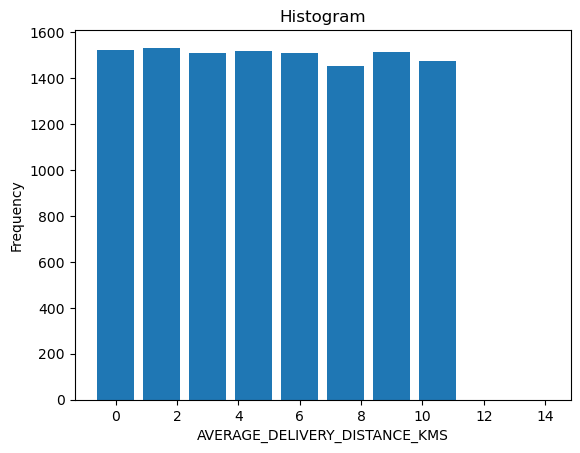

In [1064]:
# Plot a histogram with x as data and y as frequency
plt.hist(data['AVERAGE_DELIVERY_DISTANCE_KMS'], range=(0,15), align='left', rwidth=0.8)

# Set labels and title
plt.xlabel('AVERAGE_DELIVERY_DISTANCE_KMS')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

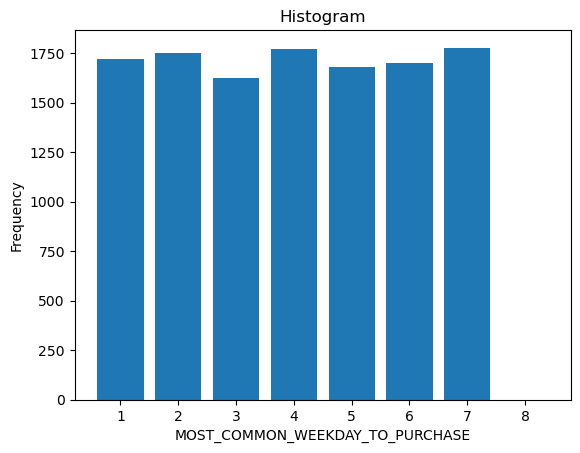

In [1065]:
# Plot a histogram with x as data and y as frequency
plt.hist(data['MOST_COMMON_WEEKDAY_TO_PURCHASE'], bins=range(1,10), align='left', rwidth=0.8)

# Set labels and title
plt.xlabel('MOST_COMMON_WEEKDAY_TO_PURCHASE')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

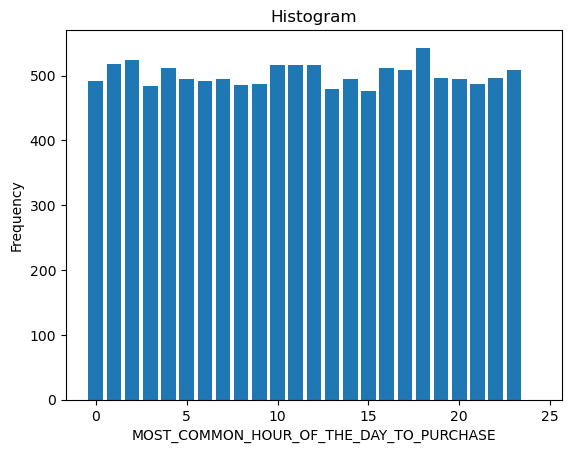

In [1066]:
# Plot a histogram with x as data and y as frequency
plt.hist(data['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'], bins=range(0,26), align='left', rwidth=0.8)

# Set labels and title
plt.xlabel('MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

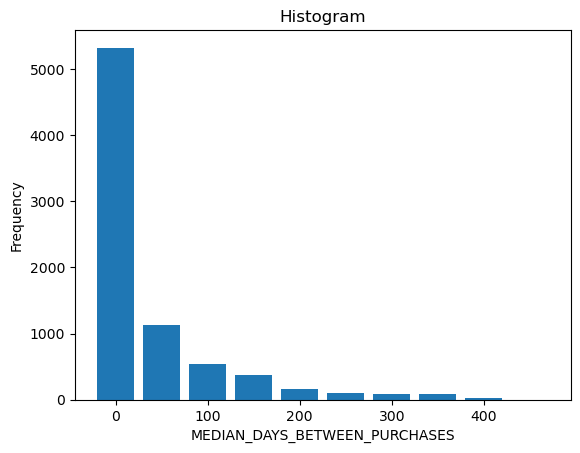

In [1067]:
# Plot a histogram with x as data and y as frequency
plt.hist(data['MEDIAN_DAYS_BETWEEN_PURCHASES'], range=(0,500), align='left', rwidth=0.8)

# Set labels and title
plt.xlabel('MEDIAN_DAYS_BETWEEN_PURCHASES')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

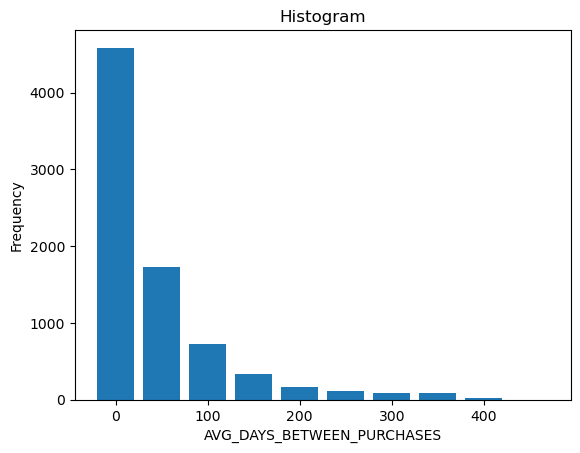

In [1068]:
# Plot a histogram with x as data and y as frequency
plt.hist(data['AVG_DAYS_BETWEEN_PURCHASES'], range=(0,500), align='left', rwidth=0.8)

# Set labels and title
plt.xlabel('AVG_DAYS_BETWEEN_PURCHASES') 
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

The customers for which the Average days between purchases is less are more loyal, while the customers that have higher number of average days between purchases are not that loyal customer and require more targeted marketing to encourage repeat purchases. While by repeated monitoring we need to focus our marketing on customers for whom the average days between purchases increase with time.

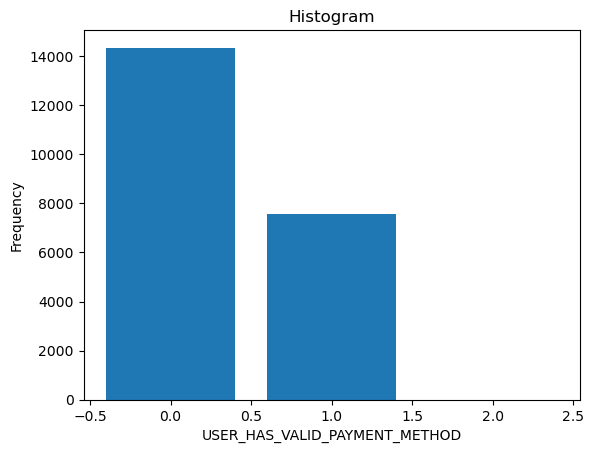

In [1069]:
# Plot a histogram with x as data and y as frequency
plt.hist(data['USER_HAS_VALID_PAYMENT_METHOD'], bins=range(0,4), align='left', rwidth=0.8)

# Set labels and title
plt.xlabel('USER_HAS_VALID_PAYMENT_METHOD')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

This histogram shows that how many users have a valid payment method on file or not, and are therefore able to make purchases. Users without a valid payment method may have abandoned their cart or may have encountered issues with their payment, leading to lost sales for the business. By tracking the number and percentage of users with valid payment methods, a business can get a better sense of its revenue potential and identify areas where it may be losing potential sales.
If there is a sudden decrease in the percentage of users with valid payment methods, it may indicate a problem with the checkout process or with the payment gateway, which could lead to lost sales if not addressed quickly.

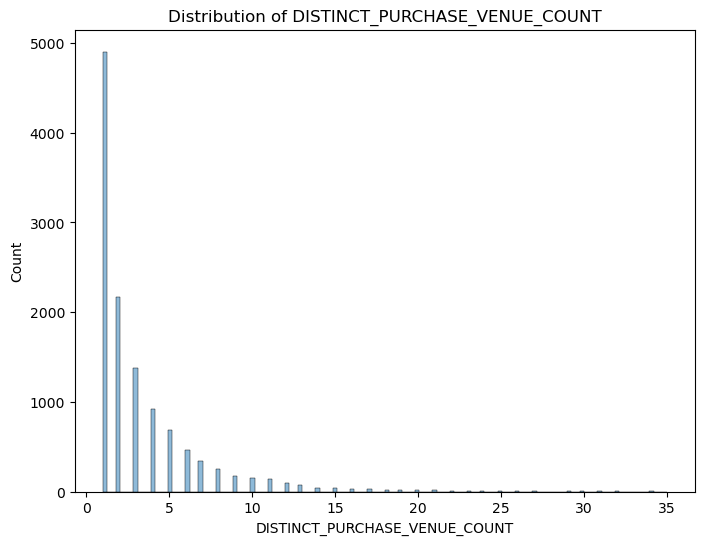

In [1070]:
# plotting a historgam

# Set figure size
plt.figure(figsize=(8,6))

# Create histogram with hue
sns.histplot(data=data[data['DISTINCT_PURCHASE_VENUE_COUNT'] != 0][['DISTINCT_PURCHASE_VENUE_COUNT']], x='DISTINCT_PURCHASE_VENUE_COUNT', binrange=(1,35), kde=False, alpha=0.5)

# Add axis labels and title
plt.xlabel('DISTINCT_PURCHASE_VENUE_COUNT')
plt.ylabel('Count')
plt.title('Distribution of DISTINCT_PURCHASE_VENUE_COUNT')

# Show plot
plt.show()

Customers who purchased from multiple venues may be more willing to try new products or services, while a customer who consistently purchases from the same venue may be more loyal to that brand. This information can be used to develop more targeted marketing strategies and tailored product offerings to better meet the needs and preferences of customers.

In [1071]:
#data[data['PREFERRED_RESTAURANT_TYPES'].isnull()==False][['PREFERRED_RESTAURANT_TYPES']]

C:\Users\admin\AppData\Local\Temp\ipykernel_13924\2333455721.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.loc[:, data.columns != 'LATE_NIGHT_PURCHASES'].corr()


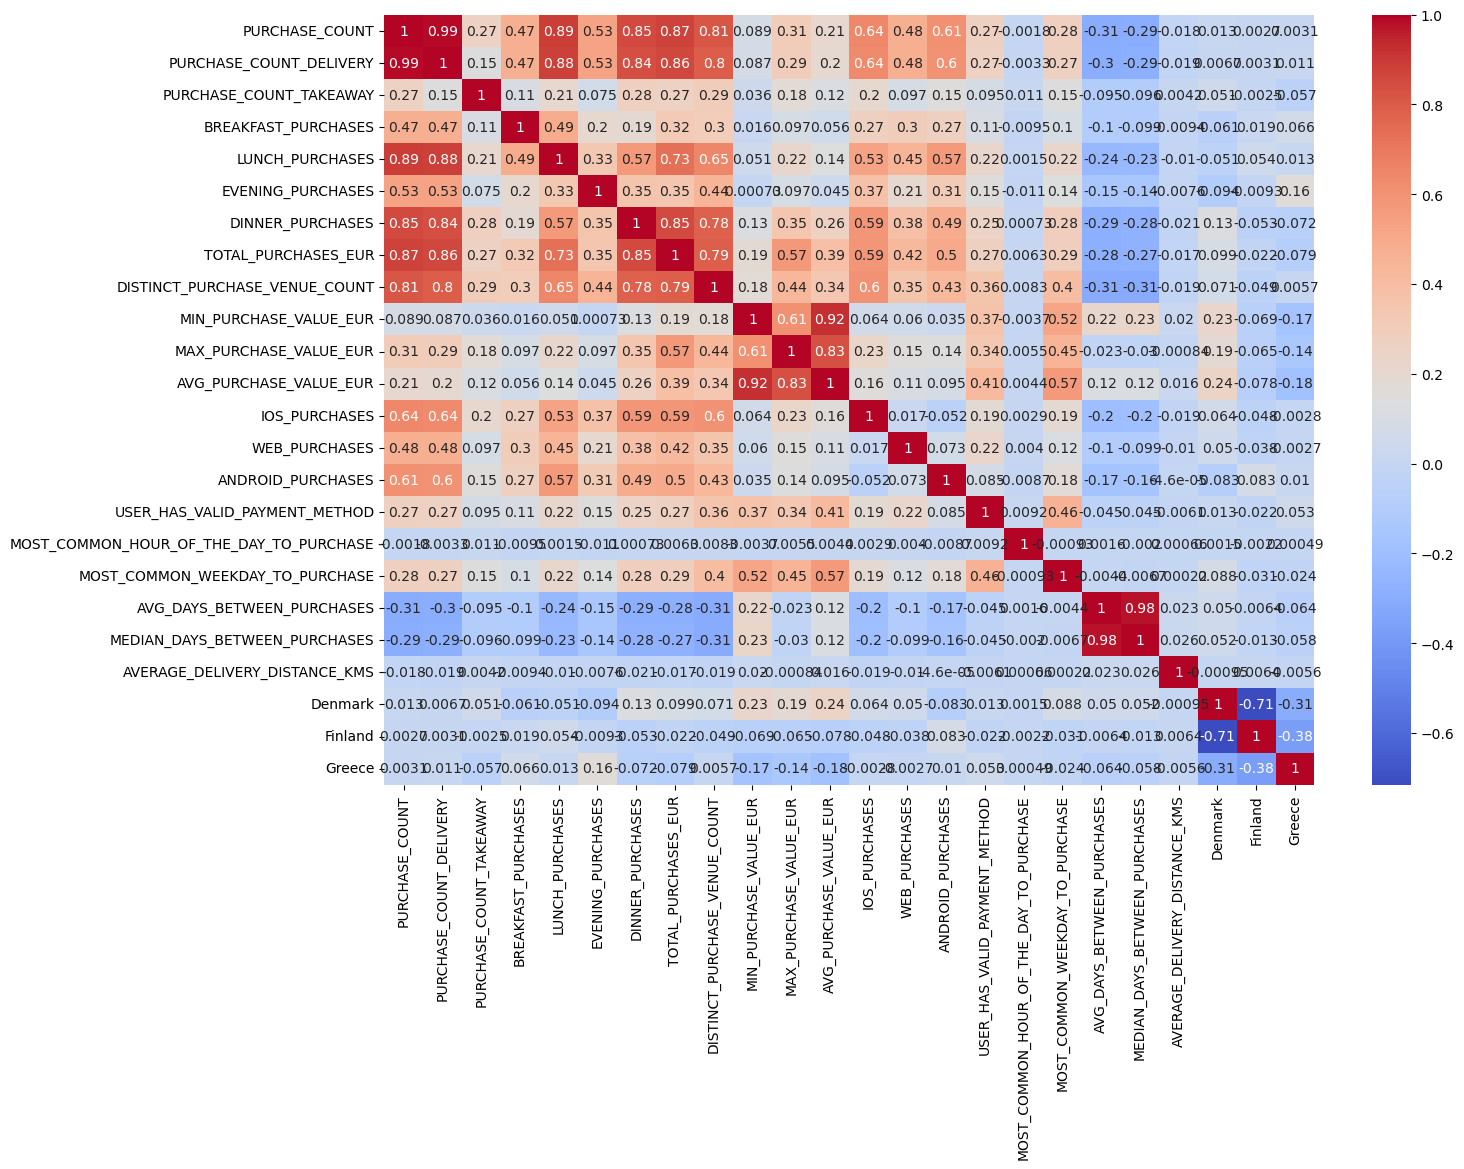

In [1072]:
## Generation correlation matrix
corr_matrix=data.loc[:, data.columns != 'LATE_NIGHT_PURCHASES'].corr()

## Create a new figure with a larger size
fig, ax = plt.subplots(figsize=(15, 10))

## Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

## Show the plot
plt.show()

## This heat map shows correlation among columns

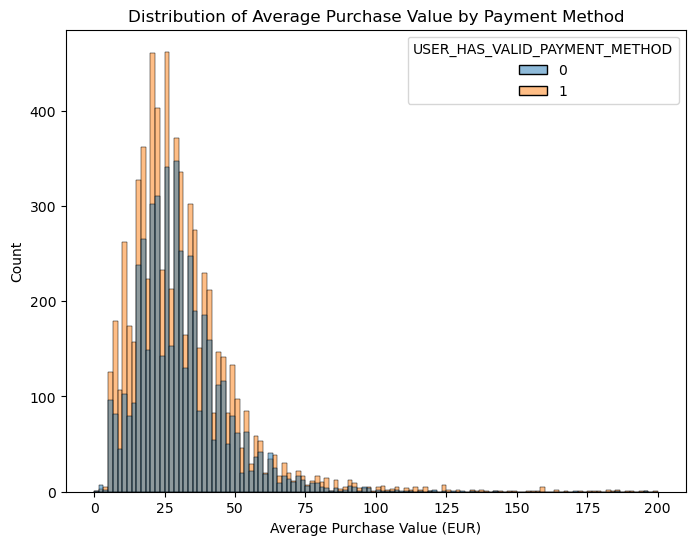

In [1073]:
# plotting a historgam

# Set figure size
plt.figure(figsize=(8,6))

# Create histogram with hue
sns.histplot(data=data[data['AVG_PURCHASE_VALUE_EUR'] != 0][['AVG_PURCHASE_VALUE_EUR','USER_HAS_VALID_PAYMENT_METHOD']], x='AVG_PURCHASE_VALUE_EUR', hue='USER_HAS_VALID_PAYMENT_METHOD', binrange=(0,200) , kde=False, alpha=0.5)

# Add axis labels and title
plt.xlabel('Average Purchase Value (EUR)')
plt.ylabel('Count')
plt.title('Distribution of Average Purchase Value by Payment Method')

# Show plot
plt.show()

Users who have a valid payment method tend to have a higher average purchase value compared to those who don't. This suggests that users who are more engaged with the platform and are making more purchases tend to have a valid payment method. Thus, they should be targeted with promotions and loyalty programs to retain them.

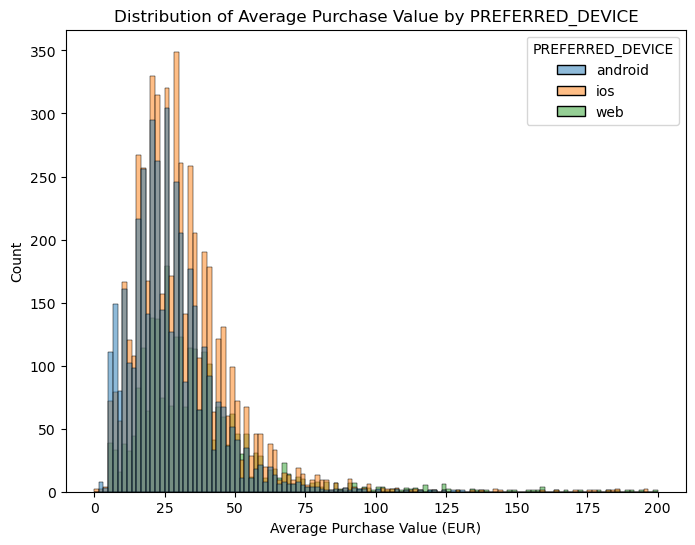

In [1074]:
# plotting a historgam

# Set figure size
plt.figure(figsize=(8,6))

# Create histogram with hue
sns.histplot(data=data[data['AVG_PURCHASE_VALUE_EUR'] != 0][['AVG_PURCHASE_VALUE_EUR','PREFERRED_DEVICE']], x='AVG_PURCHASE_VALUE_EUR', hue='PREFERRED_DEVICE', binrange=(0,200) , kde=False, alpha=0.5)

# Add axis labels and title
plt.xlabel('Average Purchase Value (EUR)')
plt.ylabel('Count')
plt.title('Distribution of Average Purchase Value by PREFERRED_DEVICE')

# Show plot
plt.show()

This shows that the users that prefer IOS tend to have a higher average purchase value followed by android and web being the lowest, So it is important to prioritize updates to the IOS and Android app to ensure the best possible user experience for the largest segment of the user base. In addition to this, the low number of users on Web indicates that there is a need to see if the Website interface needs any improvements to make it more userfriendly. 

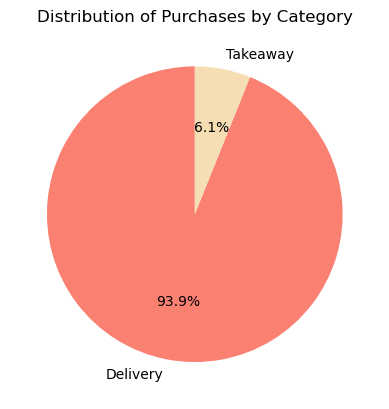

In [1075]:
# Calculate total number of purchases for each category
delivery_purchases = data['PURCHASE_COUNT_DELIVERY'].sum()
takeaway_purchases = data['PURCHASE_COUNT_TAKEAWAY'].sum()

# Create data for the pie chart
labels = ['Delivery', 'Takeaway']
sizes = [delivery_purchases, takeaway_purchases]
colors = ['salmon', 'wheat']

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
ax1.set_title('Distribution of Purchases by Category')

# Show the chart
plt.show()

This pie chart indicate that the purchase count of deliveries is significantly higher than that of takeaways, thus the business should focus the marketing strategies to increase sales in that area.

In [1076]:
# Calculate total number of purchases for each category

user_count=data.groupby("REGISTRATION_COUNTRY").size().reset_index(name='users_number')
user_count[user_count['users_number']>70][['REGISTRATION_COUNTRY','users_number']]


,REGISTRATION_COUNTRY,users_number
14,DNK,8060
17,FIN,10244
23,GRC,3032


This shows that the user base of mostly concentrated in the just Finland, Denmark and Greece, thus these countries should be focus and be target for marketing strategies and promotion

In [1077]:
data['Denmark']=(data['REGISTRATION_COUNTRY']=='DNK').astype(int)
data['Finland']=(data['REGISTRATION_COUNTRY']=='FIN').astype(int)
data['Greece']=(data['REGISTRATION_COUNTRY']=='GRC').astype(int)
data.head(5)

## Converting highly concentrated countries to categorical variables to use in Kmeans clustering

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,Denmark,Finland,Greece
0,2019-09-01,DNK,0,0,0,NaT,NaT,1,0,0,0,0,0,0.000,0,0.000,0.000,0.000,ios,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",1,0,0
1,2019-09-01,FIN,1,1,0,2020-09-02,2020-09-02,2,0,1,0,0,0,38.456,1,38.532,38.608,38.456,android,0,0,1,NaN,0,23.0,2,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,1,0
2,2019-09-01,DNK,19,19,0,2019-12-10,2020-05-25,3,0,4,1,14,0,631.488,9,20.280,43.688,33.396,android,0,19,0,NaN,1,21.0,2,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",1,0,0
3,2019-09-01,FIN,0,0,0,NaT,NaT,4,0,0,0,0,0,0.000,0,0.000,0.000,0.000,android,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,1,0
4,2019-09-01,GRC,0,0,0,NaT,NaT,5,0,0,0,0,0,0.000,0,0.000,0.000,0.000,android,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",0,0,1


### Data Processing

In [1078]:
data_cl=data[data['PURCHASE_COUNT']!=0][['PURCHASE_COUNT','PURCHASE_COUNT_DELIVERY','PURCHASE_COUNT_TAKEAWAY','BREAKFAST_PURCHASES','LUNCH_PURCHASES','EVENING_PURCHASES','DINNER_PURCHASES','TOTAL_PURCHASES_EUR','DISTINCT_PURCHASE_VENUE_COUNT','MIN_PURCHASE_VALUE_EUR','MAX_PURCHASE_VALUE_EUR','AVG_PURCHASE_VALUE_EUR','USER_HAS_VALID_PAYMENT_METHOD','MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE','MOST_COMMON_WEEKDAY_TO_PURCHASE','IOS_PURCHASES','WEB_PURCHASES','ANDROID_PURCHASES','Denmark','Finland','Greece']]
df=data_cl.values
df=np.nan_to_num(df)

sc = StandardScaler()

cluster_data = sc.fit_transform(df)



### Modeling

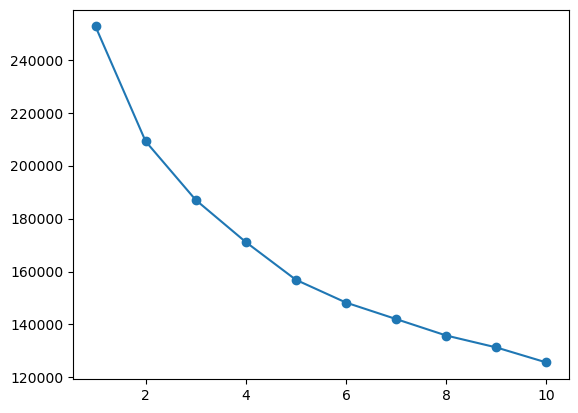

In [1079]:
## Choosing Number of Clusters

### Elbow Analysis to find number of clusters ###
n_clusters = range(1, 11)
cluster_sse = []
for i in n_clusters:
    kmeans = KMeans(init = 'k-means++',n_clusters= i,n_init = 12)
    kmeans.fit(cluster_data)
    cluster_sse.append(kmeans.inertia_)
    
plt.plot(n_clusters, cluster_sse, marker = "o")
plt.show()

Looking at the graph above, it can be seen that the variability drops considerably after the addition of 8-10 clusters. It can be safely assumed that the number of clusters is 9

### Clustering

In [1080]:
clusters=9
kmeans = KMeans(init = 'k-means++',n_clusters=clusters ,n_init = 12,random_state=14)
kmeans.fit(cluster_data)
labels = kmeans.labels_

In [1081]:
data_cl['cluster_num'] = labels
data_cl.head()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,Denmark,Finland,Greece,cluster_num
1,1,1,0,0,1,0,0,38.456,1,38.532,38.608,38.456,0,23.0,2,0,0,1,0,1,0,1
2,19,19,0,0,4,1,14,631.488,9,20.280,43.688,33.396,1,21.0,2,0,19,0,1,0,0,3
7,1,1,0,0,0,1,0,19.228,1,19.266,19.304,19.228,1,5.0,1,0,0,1,0,1,0,1
12,19,19,0,0,8,0,11,587.972,3,19.266,47.752,31.372,1,7.0,3,19,0,0,0,1,0,3
13,2,2,0,0,1,1,0,118.404,1,57.798,60.960,59.708,0,5.0,6,0,0,2,0,1,0,1


### Justifications and Insights

In [1082]:
cl_mean=data_cl.groupby('cluster_num').agg(['mean', 'std','count'])
cl_mean

PURCHASE_COUNT                  PURCHASE_COUNT_DELIVERY  \
                      mean        std count                    mean   
cluster_num                                                           
0                 2.878734   2.283464  3950                2.608608   
1                 3.317546   2.995569  4645                3.120560   
2                48.585714  20.298849    70               46.657143   
3                15.918063   4.988411  1074               14.624767   
4                30.490446  12.239421   314               28.933121   
5                 3.679542   3.920144  1398                3.603004   
6               138.157895  58.897522    19              138.157895   
7                 1.770950   1.592364   358                1.625698   
8                41.633166  16.360556   199               39.994975   

                             PURCHASE_COUNT_TAKEAWAY                  \
                   std count                    mean       std count   
cluster_num                                                            
0             2.235383  3950                0.270127  0.703926  3950   
1             2.958749  4645                0.196986  0.656702  4645   
2            20.158708    70                1.928571  4.287905    70   
3             5.676243  1074                1.293296  2.411647  1074   
4            12.847296   314                1.557325  4.574365   314   
5             3.906446  1398                0.076538  0.454683  1398   
6            58.897522    19                0.000000  0.000000    19   
7             1.530130   358                0.145251  0.450480   358   
8            16.707374   199                1.638191  4.250936   199   

            BREAKFAST_PURCHASES                  LUNCH_PURCHASES             \
                           mean        std count            mean        std   
cluster_num                                                                   
0                      0.031392   0.235013  3950        0.771392   1.173758   
1                      0.124865   0.482149  4645        1.461787   1.861162   
2                      2.171429   3.893404    70       22.742857  18.164056   
3                      0.323091   0.989642  1074        5.636872   4.490061   
4                      0.907643   1.787712   314       13.305732   8.894240   
5                      0.227468   0.774350  1398        1.473534   2.305345   
6                     11.736842  15.782698    19       71.052632  39.128668   
7                      0.148045   0.516272   358        0.656425   1.131099   
8                      1.261307   2.761946   199       16.381910  12.654495   

                  EVENING_PURCHASES                  DINNER_PURCHASES  \
            count              mean        std count             mean   
cluster_num                                                             
0            3950          0.081013   0.312675  3950         1.993671   
1            4645          0.262002   0.656601  4645         1.444995   
2              70          3.271429   5.805848    70        20.214286   
3            1074          0.846369   1.688636  1074         9.074488   
4             314          2.796178   3.626736   314        13.340764   
5            1398          0.936338   1.552086  1398         1.025036   
6              19         16.315789  20.902027    19        38.631579   
7             358          0.050279   0.254346   358         0.907821   
8             199          3.743719   5.760335   199        20.120603   

                             TOTAL_PURCHASES_EUR                     \
                   std count                mean          std count   
cluster_num                                                           
0             1.884003  3950          103.284976    92.253280  3950   
1             1.665581  4645           90.611147    86.964599  4645   
2            13.600824    70         1333.252171   755.241299    70   
3             4.647905  1074          504.

Cluster number 6 has the lowest number of customers but they have the highest purchase count while having the lowest minimum purchase value, this indicates that these are the most loyal customers and may be more likely to make additional purchases in the future. These customers may also be more sensitive to price, and can be monitored for assessing the overall price sensitivity of the market.
In addition to this, cluster number 0, 1, 3, and 5 are the customers with purchase count between 1-17 comprise of most of our customer base, they may be new or infrequent customer who have not yet developed a strong relationship with the business, and may require additional incentives or outreach to encourage additional purchases.

TOTAL_PURCHASES_EUR is a significant metric for customer segmentation, it can help the business understand the spending patterns of their customers and identify high-value customers who make frequent and large purchases. The mean of total purchase out for cluster number 6 is the highest indicating that they have higher willingness to pay and a higher level of disposable income. This may suggest that the business can target this group with premium or high-end products. They are also high-value customers who make frequent and large purchases.
Cluster number 2 and 8 are also more prone to a higher level of price and can be targeted for high value products. While cluster number 1 and 5 have lower purchase count leading towards a lower total purchase value thus these are the customers who should be targeted for promotion and encouraged towards making more purchases.

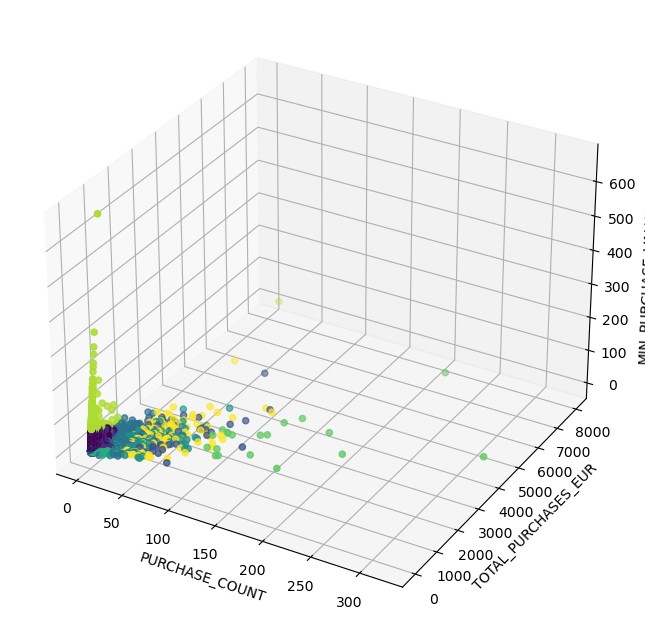

In [1002]:
# Set up the figure and the 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(xs=data_cl['PURCHASE_COUNT'], ys=data_cl['TOTAL_PURCHASES_EUR'], zs=data_cl['MIN_PURCHASE_VALUE_EUR'], c=data_cl['cluster_num'])

# Set the labels for the axes
ax.set_xlabel('PURCHASE_COUNT')
ax.set_ylabel('TOTAL_PURCHASES_EUR')
ax.set_zlabel('MIN_PURCHASE_VALUE_EUR')

# Show the plot
plt.show()

This plot clearly shows that customers can be segmented based on MIN_PURCHASE_VALUE_EUR, as cluster number 7 has very high value for minimum purchase value indicating that these customers have a higher willingness to pay and a higher level of disposable income. This may suggest that the business can target this group with premium or high-end products, as they may be more likely to purchase these items. It could also suggest that these customers are more demanding and have higher expectations for the quality of the product or service, so the business may need to ensure that they are delivering a high level of quality to meet these expectations. In addition to this these customers have a very low purchase count, which is caused by this cluster having less number of customers. They are most likely customers who place orders for their business or place large orders. Thus, they can be a focus of more targeted marketing.

MIN_PURCHASE_VALUE_EUR also indicates that the price range mostly prefered by customers is between 15-35 euro, this can help us to set pricing strategies that optimize revenue and profit.

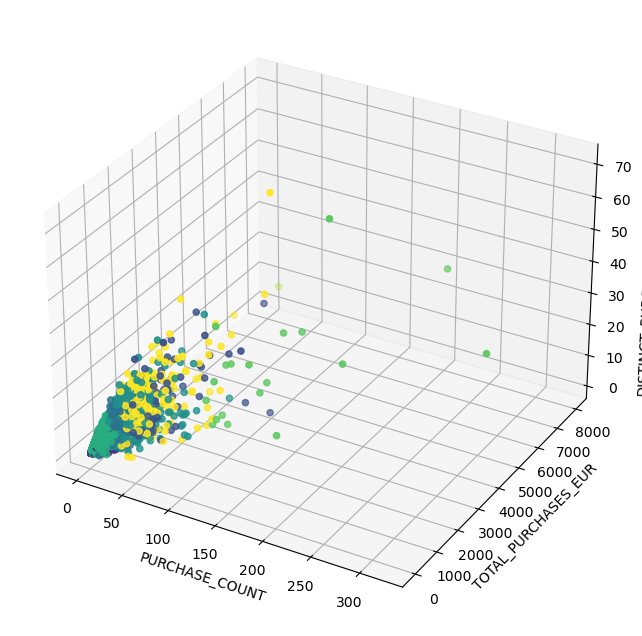

In [1004]:
# Set up the figure and the 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(xs=data_cl['PURCHASE_COUNT'], ys=data_cl['TOTAL_PURCHASES_EUR'], zs=data_cl['DISTINCT_PURCHASE_VENUE_COUNT'], c=data_cl['cluster_num'])

# Set the labels for the axes
ax.set_xlabel('PURCHASE_COUNT')
ax.set_ylabel('TOTAL_PURCHASES_EUR')
ax.set_zlabel('DISTINCT_PURCHASE_VENUE_COUNT')

# Show the plot
plt.show()

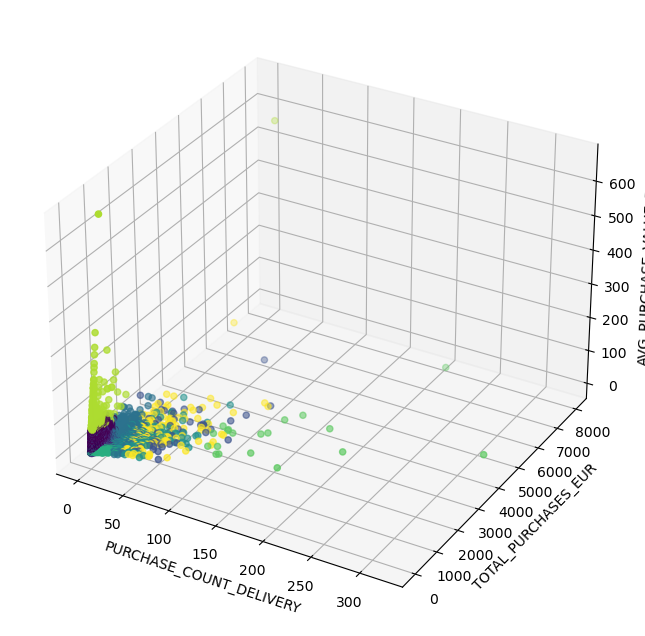

In [1005]:
# Set up the figure and the 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(xs=data_cl['PURCHASE_COUNT_DELIVERY'], ys=data_cl['TOTAL_PURCHASES_EUR'], zs=data_cl['AVG_PURCHASE_VALUE_EUR'], c=data_cl['cluster_num'])

# Set the labels for the axes
ax.set_xlabel('PURCHASE_COUNT_DELIVERY')
ax.set_ylabel('TOTAL_PURCHASES_EUR')
ax.set_zlabel('AVG_PURCHASE_VALUE_EUR')

# Show the plot
plt.show()

This plot indicated that AVG_PURCHASE_VALUE_EUR can be used for segmenting the customers, it can help us understand the spending habits of the customers and tailor our offerings and marketing strategies accordingly. Cluster number 7 has a higher average purchase value they should be offered premium or high-end products.

Majority of our customer base have an average purchase value in the range 15-35 euro, this can help us to set pricing strategies that optimize revenue and profit.

In [1083]:
data_cl['Average_days_between_purchases']=data[data['PURCHASE_COUNT']!=0]['AVG_DAYS_BETWEEN_PURCHASES']
cl_mean_n=data_cl.groupby('cluster_num').agg(['mean', 'std'])
cl_mean_n

PURCHASE_COUNT            PURCHASE_COUNT_DELIVERY             \
                      mean        std                    mean        std   
cluster_num                                                                
0                 2.878734   2.283464                2.608608   2.235383   
1                 3.317546   2.995569                3.120560   2.958749   
2                48.585714  20.298849               46.657143  20.158708   
3                15.918063   4.988411               14.624767   5.676243   
4                30.490446  12.239421               28.933121  12.847296   
5                 3.679542   3.920144                3.603004   3.906446   
6               138.157895  58.897522              138.157895  58.897522   
7                 1.770950   1.592364                1.625698   1.530130   
8                41.633166  16.360556               39.994975  16.707374   

            PURCHASE_COUNT_TAKEAWAY           BREAKFAST_PURCHASES             \
                               mean       std                mean        std   
cluster_num                                                                    
0                          0.270127  0.703926            0.031392   0.235013   
1                          0.196986  0.656702            0.124865   0.482149   
2                          1.928571  4.287905            2.171429   3.893404   
3                          1.293296  2.411647            0.323091   0.989642   
4                          1.557325  4.574365            0.907643   1.787712   
5                          0.076538  0.454683            0.227468   0.774350   
6                          0.000000  0.000000           11.736842  15.782698   
7                          0.145251  0.450480            0.148045   0.516272   
8                          1.638191  4.250936            1.261307   2.761946   

            LUNCH_PURCHASES            EVENING_PURCHASES             \
                       mean        std              mean        std   
cluster_num                                                           
0                  0.771392   1.173758          0.081013   0.312675   
1                  1.461787   1.861162          0.262002   0.656601   
2                 22.742857  18.164056          3.271429   5.805848   
3                  5.636872   4.490061          0.846369   1.688636   
4                 13.305732   8.894240          2.796178   3.626736   
5                  1.473534   2.305345          0.936338   1.552086   
6                 71.052632  39.128668         16.315789  20.902027   
7                  0.656425   1.131099          0.050279   0.254346   
8                 16.381910  12.654495          3.743719   5.760335   

            DINNER_PURCHASES            TOTAL_PURCHASES_EUR               \
                        mean        std                mean          std   
cluster_num                                                                
0                   1.993671   1.884003          103.284976    92.253280   
1                   1.444995   1.665581           90.611147    86.964599   
2                  20.214286  13.600824         1333.252171   755.241299   
3                   9.074488   4.647905          504.549844   212.771452   
4                  13.340764   8.858948          737.200102   375.938059   
5                   1.025036   1.608879           52.715210    64.739972   
6                  38.631579  24.012058         2576.765053  1378.403423   
7                   0.907821   1.132606          198.956939   444.981125   
8                  20.120603  12.204715         1155.754854   631.209955   

            DISTINCT_PURCHASE_VENUE_COUNT            MIN_PURCHASE_VALUE_EUR  \
                                     mean        std                   mean   
cluster_num                                                                   
0                                2.223291   1.511252              28.908242   
1                                2.248870   1.599708    

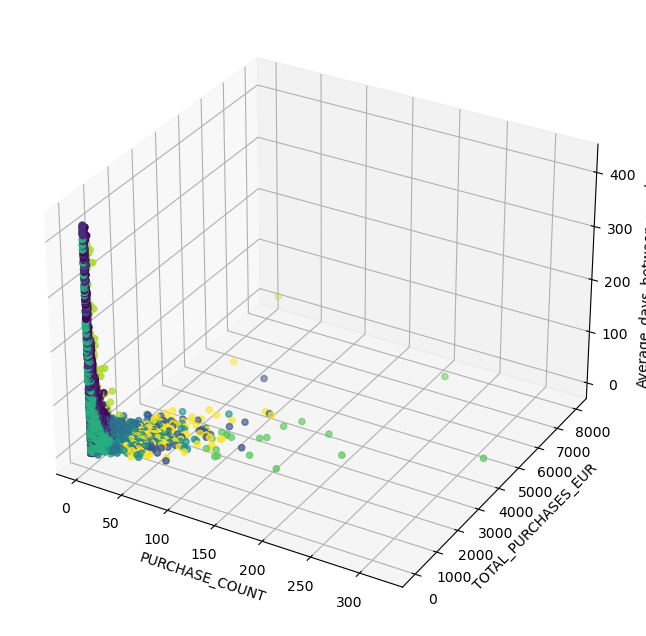

In [1084]:
# Set up the figure and the 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(xs=data_cl['PURCHASE_COUNT'], ys=data_cl['TOTAL_PURCHASES_EUR'], zs=data_cl['Average_days_between_purchases'], c=data_cl['cluster_num'])

# Set the labels for the axes
ax.set_xlabel('PURCHASE_COUNT')
ax.set_ylabel('TOTAL_PURCHASES_EUR')
ax.set_zlabel('Average_days_between_purchases')

# Show the plot
plt.show()

The plot clearly shows how Average_days_between_purchases can be used to segment the customers into groups and a lower average value means that customers are making purchases more frequently, while a higher average value means that they are making purchases less frequently.

The average days between purchase for cluster 2, 6, and 8 is the lowest indicating that they have a high customer retention rate, and these customers are more loyal to the brand. Cluster 0, 1, and 7 have the highest number of days between purchases indicating that these customers are not making repeat purchases as often, and we may need to focus on improving customer retention strategies for these customers and create targeted marketing campaigns to encourage more frequent purchases.

### Conclusion

Thus, it can be concluded that PURCHASE_COUNT, TOTAL_PURCHASES_EUR, AVG_PURCHASE_VALUE_EUR, Average_days_between_purchases, and MIN_PURCHASE_VALUE_EUR are the most significant metrics for customer segmentation and analysing customer behaviour while creating targeted marketing strategies and analyzing business revenue generation capabilities.